In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in the split data
X_train = pd.read_parquet('/content/drive/My Drive/CSVs/X_train.parquet')
X_test = pd.read_parquet('/content/drive/My Drive/CSVs/X_test.parquet')
y_train = pd.read_parquet('/content/drive/My Drive/CSVs/y_train.parquet')
y_test = pd.read_parquet('/content/drive/My Drive/CSVs/y_test.parquet')



In [7]:
# Turn y into a numpy array
y_train = y_train.values
type(y_train)

numpy.ndarray

In [8]:
X_train.columns[:10]

Index(['level_0', 'book title', 'book author', 'total words',
       'vividness score', 'passive voice', 'all adverbs', 'ly-adverbs',
       'non-ly-adverbs', 'publication year'],
      dtype='object')

In [9]:
# Drop non-predictive features
X_train = X_train.drop(columns=['level_0', 'book title', 'book author','book genres'],axis=1)
X_test = X_test.drop(columns=['level_0', 'book title', 'book author','book genres'],axis=1)

In [10]:
# Get rid of null elements
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


In [11]:
#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.decomposition import PCA

In [12]:
# Split the columns based on the scaler used--minmax for wordcounts, standard for the others
std_columns = X_train.columns[:8]
minmax_columns = X_train.columns[8:]


In [13]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [14]:
X_train_std = std_scaler.fit_transform(X_train[std_columns])
X_train_minmax = minmax_scaler.fit_transform(X_train[minmax_columns])


In [15]:
X_test_std = std_scaler.transform(X_test[std_columns])
X_test_minmax = minmax_scaler.transform(X_test[minmax_columns])

In [16]:
pca = PCA(n_components=10)
pca.fit(X_train_minmax)

PCA(n_components=10)

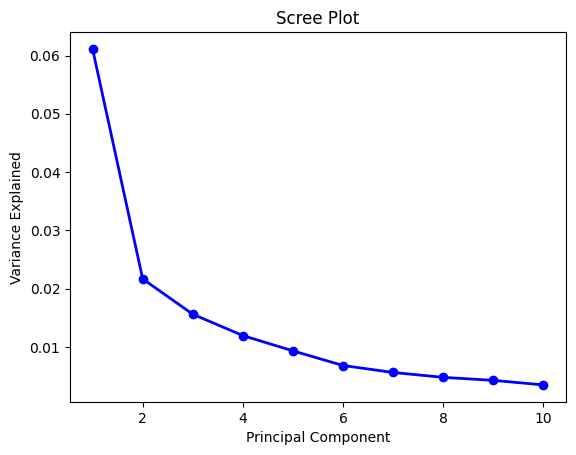

In [17]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [18]:
np.cumsum(pca.explained_variance_ratio_)


array([0.06113005, 0.08278823, 0.09838111, 0.11030746, 0.11960903,
       0.12639803, 0.13199383, 0.13675054, 0.14099021, 0.14444828])

The results of PCA show no components explaining more than 6% of the variance, which is not encouraging.

In [19]:
pca = PCA(n_components=100)
pca.fit(X_train_minmax)

PCA(n_components=100)

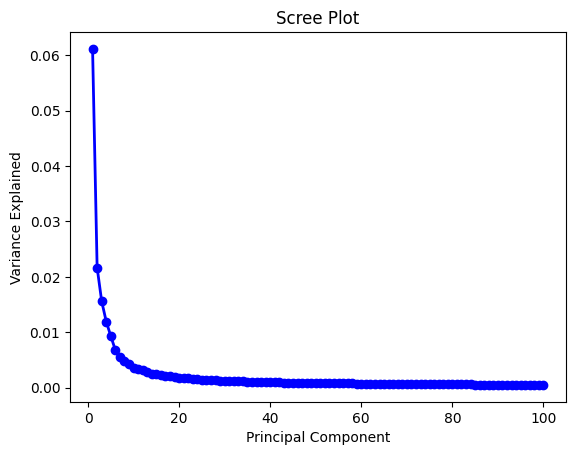

In [20]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [ ]:
np.cumsum(pca.explained_variance_ratio_)



array([0.06113005, 0.08278823, 0.09838111, 0.11030746, 0.11960903,
       0.12639803, 0.13199383, 0.13675054, 0.14099022, 0.14444832,
       0.14782921, 0.15105779, 0.15395486, 0.15645836, 0.15888521,
       0.16117838, 0.1632568 , 0.16530493, 0.1671675 , 0.16895117,
       0.17066201, 0.17234107, 0.17385865, 0.17534309, 0.17678138,
       0.17817494, 0.17953294, 0.18084053, 0.18212598, 0.18338329,
       0.18461041, 0.18580526, 0.18695906, 0.18809907, 0.18917795,
       0.19023568, 0.19126209, 0.19226722, 0.19326321, 0.19423387,
       0.19518422, 0.19612324, 0.19703487, 0.19793729, 0.19883112,
       0.19970905, 0.20057688, 0.20143176, 0.20226241, 0.20308814,
       0.20390277, 0.20470243, 0.20549131, 0.20627822, 0.20706057,
       0.20782741, 0.2085834 , 0.2093349 , 0.21007306, 0.21079905,
       0.21151932, 0.2122271 , 0.2129314 , 0.21363004, 0.2143166 ,
       0.21499373, 0.21566636, 0.2163296 , 0.21698591, 0.21763597,
       0.21828155, 0.21891642, 0.21954567, 0.22017223, 0.22079

In [21]:
# Check the percentage of nonzero components in the wordcount data
np.count_nonzero(X_train_minmax)/X_train_minmax.size



0.06057188351144687

In [20]:
from sklearn.decomposition import SparsePCA

In [16]:
# Try SparsePCA on the sparse wordcount elements.
# sparse_PCA = SparsePCA(n_components=10).fit_transform(X_train_minmax)
# np.save('/content/drive/My Drive/CSVs/sparse_PCA.npy',sparse_PCA)
sparse_PCA = np.load('/content/drive/My Drive/CSVs/sparse_PCA.npy')

In [24]:
type(sparse_PCA)

numpy.ndarray

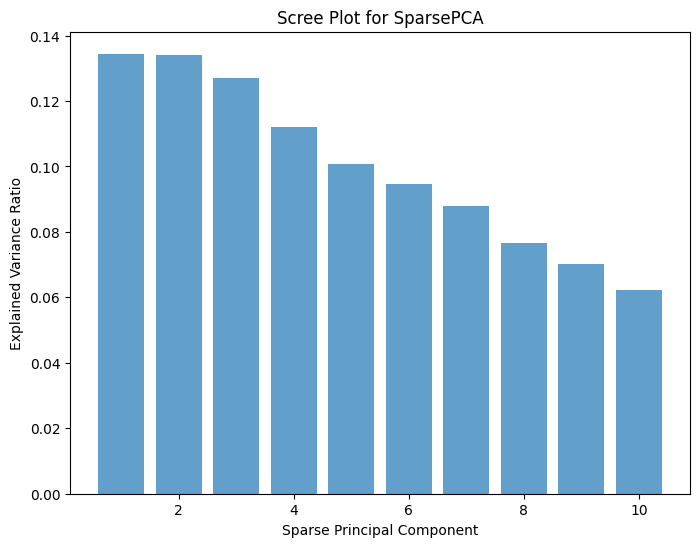

In [19]:
# Calculate the explained variance ratio
explained_variance = np.var(sparse_PCA, axis=0)
explained_variance_ratio = np.sort(explained_variance / np.sum(explained_variance))[::-1]

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Sparse Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for SparsePCA')
plt.show()

In [20]:
explained_variance_ratio.cumsum()

array([0.13445948, 0.26862486, 0.39573296, 0.50773902, 0.60860469,
       0.70321316, 0.79110081, 0.86762796, 0.93784141, 1.        ])

In [25]:
type(sparse_PCA)

numpy.ndarray

In [26]:
type(X_train_std)

numpy.ndarray

In [27]:
X_train_pca = np.concatenate((X_train_minmax, sparse_PCA), axis=1)

In [28]:
np.save('/content/drive/My Drive/CSVs/X_train_pca.npy',X_train_pca)
